## Exploratory Data Analysis & Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\raw\complaints.csv")

# Basic overview
print("Dataset shape:", df.shape)
df.head(1000)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2980\174651218.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\raw\complaints.csv")


Dataset shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,DE,XXXXX,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197297
996,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,11208,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197519
997,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PR,00983,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197520
998,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,MS,39212,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197521


## Dataset Structure and Data Quality

In [2]:
# Data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [3]:
# Missing value summary
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_summary

Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date received                         0
Product                               0
Company                               0
Date sent to company                  0
Submitted via                         0
Timely response?                      0
Complaint ID                          0
dtype: int64

## Distribution of Complaints by Product

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2980\2594564640.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


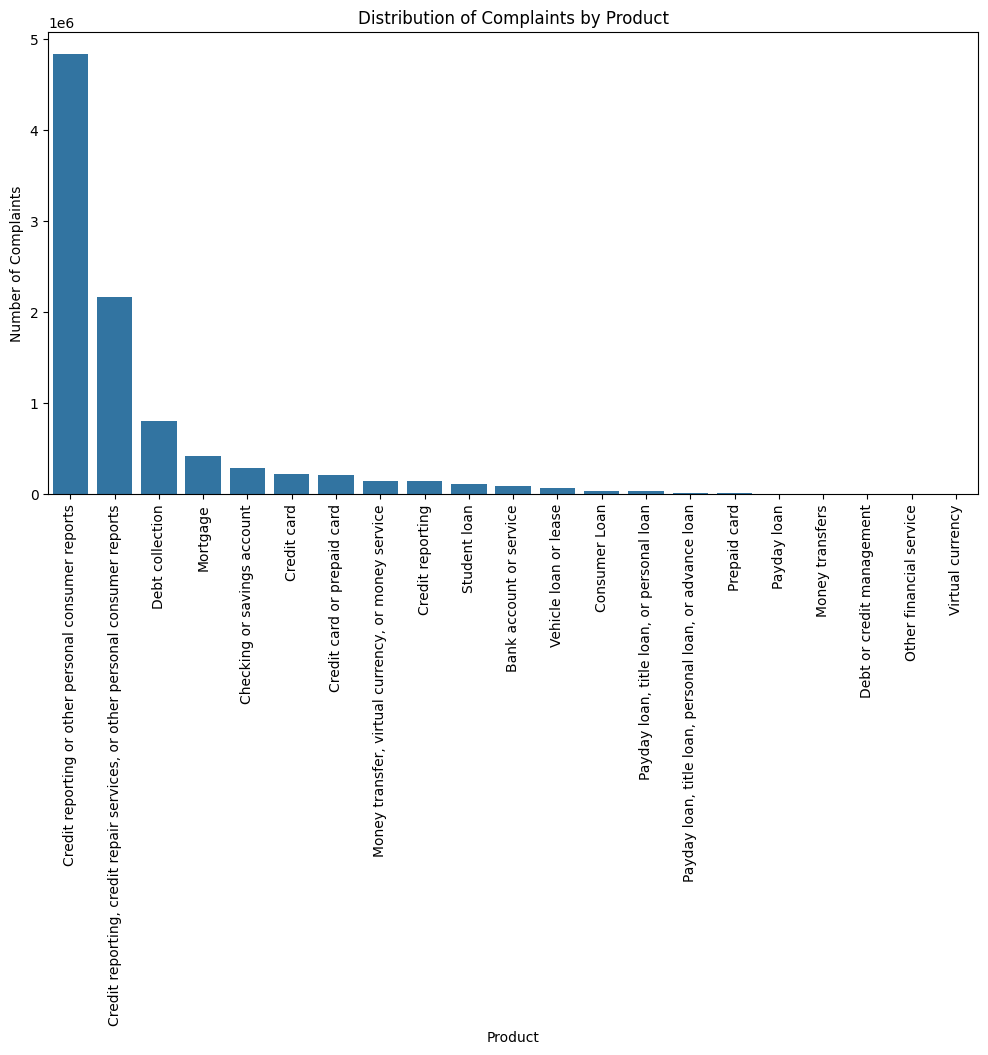

In [4]:
product_counts = df["Product"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=product_counts.index,
    y=product_counts.values
)
plt.xticks(rotation=90)
plt.title("Distribution of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


## Narrative Length Analysis (Word Count)

In [5]:
# Create word count feature
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)

In [6]:
# Summary statistics
df["narrative_word_count"].describe()

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64

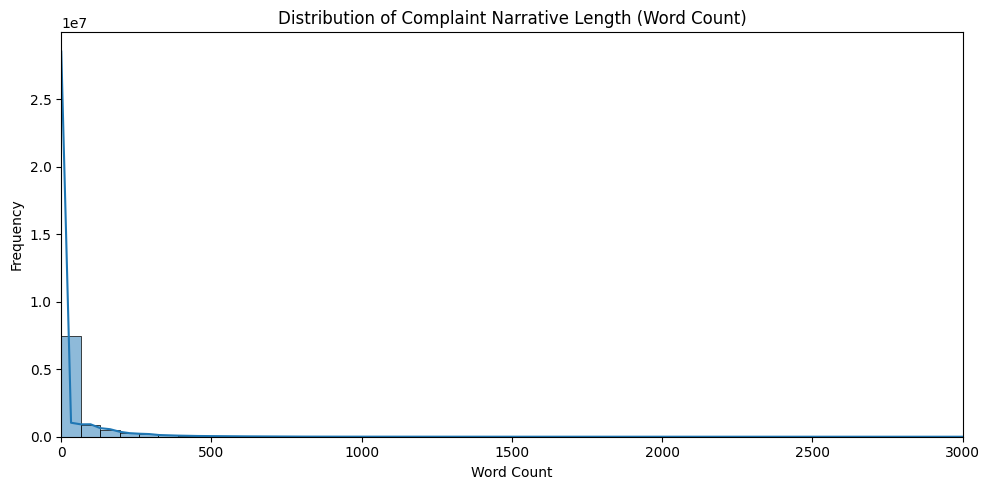

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df["narrative_word_count"],
    bins=100,
    kde=True
)
plt.title("Distribution of Complaint Narrative Length (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0, 3000)
plt.tight_layout()
plt.show()


In [8]:
with_narrative = df["Consumer complaint narrative"].notna().sum()
without_narrative = df["Consumer complaint narrative"].isna().sum()

narrative_summary = pd.DataFrame({
    "Category": ["With Narrative", "Without Narrative"],
    "Count": [with_narrative, without_narrative]
})

narrative_summary


,Category,Count
0,With Narrative,2980756
1,Without Narrative,6629041


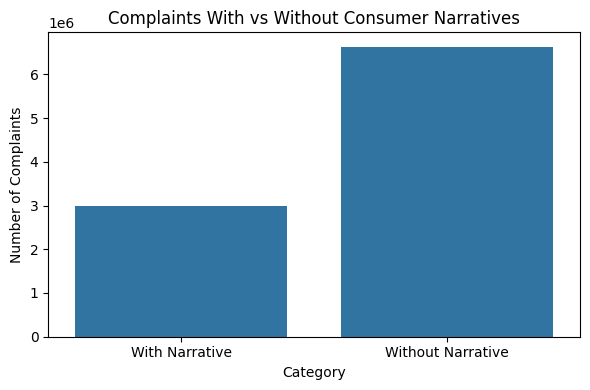

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Category",
    y="Count",
    data=narrative_summary
)
plt.title("Complaints With vs Without Consumer Narratives")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


In [10]:
# Keep only complaints with narratives
df_clean = df[df["Consumer complaint narrative"].notna()].copy()

# Remove extremely short narratives (optional threshold)
df_clean = df_clean[df_clean["narrative_word_count"] >= 20]

print("Shape after cleaning:", df_clean.shape)


Shape after cleaning: (2856508, 19)


In [11]:
# Define the allowed products (normalized)
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]


In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\raw\complaints.csv")

# Normalize Product column for safe matching
df["Product"] = df["Product"].str.strip()

# Filter for target products only
df_filtered = df[df["Product"].isin(target_products)].copy()

print("After product filtering:", df_filtered.shape)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2980\1110625210.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\raw\complaints.csv")


After product filtering: (226686, 18)


In [13]:
# Remove missing narratives
df_filtered = df_filtered[
    df_filtered["Consumer complaint narrative"].notna()
]

# Remove empty or whitespace-only narratives
df_filtered = df_filtered[
    df_filtered["Consumer complaint narrative"].str.strip() != ""
]

print("After narrative filtering:", df_filtered.shape)


After narrative filtering: (80667, 18)


In [14]:
# Verify products included
df_filtered["Product"].value_counts()


Product
Credit card    80667
Name: count, dtype: int64

In [15]:
# Confirm no empty narratives remain
(df_filtered["Consumer complaint narrative"].str.strip() == "").sum()


np.int64(0)

In [16]:
import re
import pandas as pd
BOILERPLATE_PATTERNS = [
    r"i am writing to file a complaint",
    r"i am writing to complain",
    r"this complaint is regarding",
    r"i would like to file a complaint",
    r"this is a complaint about",
    r"i am submitting this complaint",
    r"please investigate",
    r"thank you for your time"
]


In [17]:
def clean_complaint_text(text: str) -> str:
    """
    Clean CFPB complaint narratives for embedding.
    """
    if pd.isna(text):
        return ""

    # Lowercase
    text = text.lower()

    # Remove boilerplate phrases
    for pattern in BOILERPLATE_PATTERNS:
        text = re.sub(pattern, "", text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # Remove email addresses
    text = re.sub(r"\S+@\S+", "", text)

    # Remove special characters (keep letters, numbers, basic punctuation)
    text = re.sub(r"[^a-z0-9\s\.\,\?\!]", " ", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [18]:
# Apply text cleaning
df_filtered["clean_narrative"] = df_filtered[
    "Consumer complaint narrative"
].apply(clean_complaint_text)

# Remove records that became empty after cleaning
df_filtered = df_filtered[
    df_filtered["clean_narrative"].str.strip() != ""
]

print("Shape after text cleaning:", df_filtered.shape)


Shape after text cleaning: (80667, 19)


In [19]:
# Inspect random samples
sample = df_filtered.sample(3, random_state=42)

for idx, row in sample.iterrows():
    print("\n--- ORIGINAL ---")
    print(row["Consumer complaint narrative"][:500])
    print("\n--- CLEANED ---")
    print(row["clean_narrative"][:500])



--- ORIGINAL ---
I have a balance of {$710.00} from my XXXX XXXX XXXX XXXX from Wayfair. I've contacted Wayfair to see where this charge is coming from and they stated in order to find out exactly where the charge is coming from I would have to pay the credit card minimum balance first. I paid the minimum balance and still got no insight on to why I'm being charged. So now whenever my card bill is due I just pay it off due to the fact that I've had little help from customer support. 
Wayfair directed me to XXXX 

--- CLEANED ---
i have a balance of 710.00 from my xxxx xxxx xxxx xxxx from wayfair. i ve contacted wayfair to see where this charge is coming from and they stated in order to find out exactly where the charge is coming from i would have to pay the credit card minimum balance first. i paid the minimum balance and still got no insight on to why i m being charged. so now whenever my card bill is due i just pay it off due to the fact that i ve had little help from customer suppo

In [20]:
df_filtered.to_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/filtered_complaints.csv.",
    index=False
)

In [21]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed\filtered_complaints.csv"
)

print("Total cleaned complaints:", df.shape[0])
df["Product"].value_counts(normalize=True)


Total cleaned complaints: 80667


Product
Credit card    1.0
Name: proportion, dtype: float64

## Define Target Sample Size

In [22]:
TARGET_SAMPLE_SIZE = 12000
# Calculate proportional sample sizes per product
product_counts = df["Product"].value_counts(normalize=True)

sample_sizes = (
    product_counts * TARGET_SAMPLE_SIZE
).round().astype(int)

sample_sizes


Product
Credit card    12000
Name: proportion, dtype: int64

In [23]:
df_sampled = (
    df.groupby("Product", group_keys=False)
      .apply(
          lambda x: x.sample(
              n=sample_sizes[x.name],
              random_state=42
          )
      )
)

print("Stratified sample shape:", df_sampled.shape)
df_sampled["Product"].value_counts(normalize=True)


Stratified sample shape: (12000, 19)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2980\4239309131.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Product
Credit card    1.0
Name: proportion, dtype: float64

In [24]:
df_sampled.to_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/complaints_stratified_sample_12k.csv",
    index=False
)


In [25]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

import pandas as pd
df_sampled = pd.read_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/complaints_stratified_sample_12k.csv"
)

print("Sample size:", df_sampled.shape)


c:\Users\Administrator\Desktop\rag-complaint-chatbot\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sample size: (12000, 19)


In [26]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", ".", " ", ""]
)


In [27]:
chunked_records = []

for _, row in df_sampled.iterrows():
    chunks = text_splitter.split_text(row["clean_narrative"])

    for i, chunk in enumerate(chunks):
        chunked_records.append({
            "complaint_id": row["Complaint ID"],
            "product": row["Product"],
            "issue": row["Issue"],
            "company": row["Company"],
            "state": row["State"],
            "chunk_index": i,
            "total_chunks": len(chunks),
            "text_chunk": chunk
        })

df_chunks = pd.DataFrame(chunked_records)

print("Total chunks created:", df_chunks.shape[0])
df_chunks.head()


Total chunks created: 36251


,complaint_id,product,issue,company,state,chunk_index,total_chunks,text_chunk
0,7548263,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",IL,0,2,i have a balance of 710.00 from my xxxx xxxx x...
1,7548263,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",IL,1,2,". wayfair directed me to xxxx and, xxxx direct..."
2,11805170,Credit card,Fees or interest,AMERICAN EXPRESS COMPANY,SC,0,2,my original credit card rate on my american ex...
3,11805170,Credit card,Fees or interest,AMERICAN EXPRESS COMPANY,SC,1,2,. these actions are just a money grab by ameri...
4,10034123,Credit card,Improper use of your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,0,2,xxxx xxxx xxxx xxxx xxxx xxxx xxxx fl xxxx tra...


In [28]:
df_chunks.to_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/complaints_chunked_500_50.csv",
    
    index=False
)


In [29]:
from sentence_transformers import SentenceTransformer
df_chunks = pd.read_csv(
      r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/complaints_chunked_500_50.csv",
)

print("Number of chunks:", df_chunks.shape[0])


Number of chunks: 36251


In [30]:
# Load embedding model
embedding_model = SentenceTransformer(
    "sentence-transformers/all-MiniLM-L6-v2"
)

# Verify embedding dimension
embedding_model.get_sentence_embedding_dimension()


384

In [31]:
# Generate embeddings
embeddings = embedding_model.encode(
    df_chunks["text_chunk"].tolist(),
    batch_size=64,
    show_progress_bar=True,
    normalize_embeddings=True
)

print("Embedding shape:", embeddings.shape)


Batches: 100%|██████████| 567/567 [16:30<00:00,  1.75s/it]


Embedding shape: (36251, 384)


In [32]:
# Core libraries
import pandas as pd
from sentence_transformers import SentenceTransformer

# Vector store
import chromadb
from chromadb.config import Settings


In [33]:
df_chunks = pd.read_csv(
    r"C:\Users\Administrator\Desktop\rag-complaint-chatbot\data\processed/complaints_chunked_500_50.csv",
)

print("Total chunks:", df_chunks.shape[0])
df_chunks.head()


Total chunks: 36251


,complaint_id,product,issue,company,state,chunk_index,total_chunks,text_chunk
0,7548263,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",IL,0,2,i have a balance of 710.00 from my xxxx xxxx x...
1,7548263,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",IL,1,2,". wayfair directed me to xxxx and, xxxx direct..."
2,11805170,Credit card,Fees or interest,AMERICAN EXPRESS COMPANY,SC,0,2,my original credit card rate on my american ex...
3,11805170,Credit card,Fees or interest,AMERICAN EXPRESS COMPANY,SC,1,2,. these actions are just a money grab by ameri...
4,10034123,Credit card,Improper use of your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,0,2,xxxx xxxx xxxx xxxx xxxx xxxx xxxx fl xxxx tra...


In [34]:
embeddings = embedding_model.encode(
    df_chunks["text_chunk"].tolist(),
    batch_size=64,
    show_progress_bar=True,
    normalize_embeddings=True
)

print("Embedding matrix shape:", embeddings.shape)


Batches: 100%|██████████| 567/567 [16:21<00:00,  1.73s/it]


Embedding matrix shape: (36251, 384)


In [35]:
chroma_client = chromadb.Client(
    Settings(
        persist_directory="data/processed/vector_store/chroma",
        anonymized_telemetry=False
    )
)

collection = chroma_client.get_or_create_collection(
    name="cfpb_complaints"
)


In [36]:
documents = df_chunks["text_chunk"].tolist()

metadatas = [
    {
        "complaint_id": row["complaint_id"],
        "product": row["product"],
        "issue": row["issue"],
        "company": row["company"],
        "state": row["state"],
        "chunk_index": int(row["chunk_index"]),
        "total_chunks": int(row["total_chunks"])
    }
    for _, row in df_chunks.iterrows()
]

ids = [
    f'{row["complaint_id"]}_chunk_{row["chunk_index"]}'
    for _, row in df_chunks.iterrows()
]


In [37]:
BATCH_SIZE = 1000
from tqdm import tqdm

def batch_add_to_chroma(
    collection,
    documents,
    embeddings,
    metadatas,
    ids,
    batch_size=1000
):
    total = len(documents)

    for i in tqdm(range(0, total, batch_size)):
        collection.add(
            documents=documents[i:i + batch_size],
            embeddings=embeddings[i:i + batch_size],
            metadatas=metadatas[i:i + batch_size],
            ids=ids[i:i + batch_size]
        )
batch_add_to_chroma(
    collection=collection,
    documents=documents,
    embeddings=embeddings.tolist(),
    metadatas=metadatas,
    ids=ids,
    batch_size=1000
)





100%|██████████| 37/37 [00:28<00:00,  1.31it/s]


In [38]:
query = "credit card was charged twice and not refunded"

query_embedding = embedding_model.encode(
    query,
    normalize_embeddings=True
)

results = collection.query(
    query_embeddings=[query_embedding.tolist()],
    n_results=5
)

results


{'ids': [['1854081_chunk_0',
   '9781768_chunk_0',
   '7627636_chunk_1',
   '7627636_chunk_0',
   '1321995_chunk_0']],
 'embeddings': None,
 'documents': [['my visa credit card was repeatedly charged after i authorized a single payment and even though the company rep originally apologized for the mistake, saying they would refund my money within 3 5 business days, i never received my refund and the rep no longer works there. i have filed numerous complaints with agencies and organizations but no one will help me get my money back',
   'upon reviewing my credit card statement with chase bank, i noticed two charges of 700.00 from the same vendor. one charge was legitimate, but the other was not. after months of discussions with the vendor, the vendor agreed to issue a refund for the duplicate charge, but as of xx xx year , i have not received it. i filed a dispute case with chase bank on xx xx year . on xx xx year , i received an email requesting additional information, which i have coll

In [39]:
# Initialize Chroma client pointing to pre-built store
chroma_client = chromadb.Client(
    Settings(
        persist_directory="data/processed/vector_store/chroma",
        anonymized_telemetry=False
    )
)

# Load existing collection
collection = chroma_client.get_collection(
    name="cfpb_complaints"
)

print("Total vectors in store:", collection.count())


Total vectors in store: 36251


In [40]:
def retrieve_relevant_chunks(
    query: str,
    collection,
    embedding_model,
    k: int = 5
):
    """
    Retrieve top-k relevant complaint chunks for a user query.
    """
    # Embed the query
    query_embedding = embedding_model.encode(
        query,
        normalize_embeddings=True
    )

    # Perform similarity search
    results = collection.query(
        query_embeddings=[query_embedding.tolist()],
        n_results=k
    )

    retrieved_chunks = []

    for i in range(len(results["documents"][0])):
        retrieved_chunks.append({
            "text": results["documents"][0][i],
            "metadata": results["metadatas"][0][i],
            "distance": results["distances"][0][i]
        })

    return retrieved_chunks


In [41]:
query = "credit card charged twice and bank refused refund"

results = retrieve_relevant_chunks(
    query=query,
    collection=collection,
    embedding_model=embedding_model,
    k=5
)

for idx, r in enumerate(results, 1):
    print(f"\nResult {idx}")
    print("Product:", r["metadata"]["product"])
    print("Company:", r["metadata"]["company"])
    print("Distance:", r["distance"])
    print("Text:", r["text"][:300])



Result 1
Product: Credit card
Company: JPMORGAN CHASE & CO.
Distance: 0.5964760780334473
Text: upon reviewing my credit card statement with chase bank, i noticed two charges of 700.00 from the same vendor. one charge was legitimate, but the other was not. after months of discussions with the vendor, the vendor agreed to issue a refund for the duplicate charge, but as of xx xx year , i have no

Result 2
Product: Credit card
Company: WELLS FARGO & COMPANY
Distance: 0.6370080709457397
Text: my visa credit card was repeatedly charged after i authorized a single payment and even though the company rep originally apologized for the mistake, saying they would refund my money within 3 5 business days, i never received my refund and the rep no longer works there. i have filed numerous compla

Result 3
Product: Credit card
Company: JPMORGAN CHASE & CO.
Distance: 0.6548525094985962
Text: thought charge was fraudulent turned out it was n t. bank charged back merchants account. i paid merchant aga

In [42]:
RAG_PROMPT_TEMPLATE = """
You are a financial analyst assistant for CrediTrust.

Your role is to answer questions about customer complaints using ONLY the information provided in the context below.
The context consists of excerpts from real consumer complaint narratives retrieved based on semantic similarity.

Rules:
- Use only the provided context to answer the question.
- Do NOT use outside knowledge or make assumptions.
- If the context does not contain enough information to answer the question, explicitly state that you do not have enough information.
- Be concise, factual, and analytical in your response.
- When relevant, summarize common patterns or issues mentioned in the complaints.

Context:
{context}

Question:
{question}

Answer:
"""


In [43]:
def build_context(retrieved_chunks):
    """
    Combine retrieved text chunks into a single context string.
    """
    context_parts = []

    for i, chunk in enumerate(retrieved_chunks, 1):
        metadata = chunk["metadata"]
        context_parts.append(
            f"[Excerpt {i} | Product: {metadata.get('product')} | "
            f"Company: {metadata.get('company')}]\n"
            f"{chunk['text']}"
        )

    return "\n\n".join(context_parts)


In [44]:
query = "Why are customers complaining about money transfer delays?"

retrieved_chunks = retrieve_relevant_chunks(
    query=query,
    collection=collection,
    embedding_model=embedding_model,
    k=5
)

context = build_context(retrieved_chunks)

final_prompt = RAG_PROMPT_TEMPLATE.format(
    context=context,
    question=query
)

print(final_prompt)



You are a financial analyst assistant for CrediTrust.

Your role is to answer questions about customer complaints using ONLY the information provided in the context below.
The context consists of excerpts from real consumer complaint narratives retrieved based on semantic similarity.

Rules:
- Use only the provided context to answer the question.
- Do NOT use outside knowledge or make assumptions.
- If the context does not contain enough information to answer the question, explicitly state that you do not have enough information.
- Be concise, factual, and analytical in your response.
- When relevant, summarize common patterns or issues mentioned in the complaints.

Context:
[Excerpt 1 | Product: Credit card | Company: TRANSUNION INTERMEDIATE HOLDINGS, INC.]
ensuring punctual payments, i have never experienced delays on this account. i m unsure why there are indications of late payment remarks on my accounts.

[Excerpt 2 | Product: Credit card | Company: EQUIFAX, INC.]
ensuring punctu

In [45]:
from transformers import pipeline

llm = pipeline(
    task="text2text-generation",
    model="google/flan-t5-base",
    max_new_tokens=200,
    temperature=0.0
)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [46]:
def generate_rag_answer(
    question: str,
    collection,
    embedding_model,
    llm,
    k: int = 5
):
    """
    Full RAG generation pipeline:
    retrieval → prompt construction → LLM generation
    """

    # Step 1: Retrieve relevant chunks
    retrieved_chunks = retrieve_relevant_chunks(
        query=question,
        collection=collection,
        embedding_model=embedding_model,
        k=k
    )

    # Step 2: Build context
    context = build_context(retrieved_chunks)

    # Step 3: Construct prompt
    prompt = RAG_PROMPT_TEMPLATE.format(
        context=context,
        question=question
    )

    # Step 4: Generate response
    response = llm(prompt)[0]["generated_text"]

    # Optional: strip prompt echo if model returns full text
    answer = response.replace(prompt, "").strip()

    return answer


In [48]:
question = "What issues are customers reporting about credit card billing disputes?"

answer = generate_rag_answer(
    question=question,
    collection=collection,
    embedding_model=embedding_model,
    llm=llm,
    k=3
)

print(answer)


unresolved billing disputes on my bank of america credit card account ending in xxxx. despite initiating multiple disputes and following the necessary procedures, i am concerned that these claims are not being resolved in compliance with the timeframes mandated by federal law.


In [50]:
evaluation_results = []

questions = [
    "What issues are customers reporting about credit card billing disputes?",
    "Why are customers complaining about delays in money transfers?",
    "What problems do customers face with personal loan repayment or fees?",
    "Are there recurring complaints about savings account access or withdrawals?",
    "How do companies respond to disputed transactions reported by consumers?",
    "What regulatory or legal concerns do customers raise in their complaints?",
    "Are customers satisfied with how their complaints are resolved?"
]
def truncate_context(context: str, max_tokens: int = 400) -> str:
    """
    Truncate context to approximately max_tokens words.
    This prevents exceeding the model's context window.
    """
    tokens = context.split()
    if len(tokens) <= max_tokens:
        return context
    return " ".join(tokens[:max_tokens])

for q in questions:
    retrieved = retrieve_relevant_chunks(
        query=q,
        collection=collection,
        embedding_model=embedding_model,
        k=5
    )

    context = build_context(retrieved)
    context = truncate_context(context, max_tokens=400)

    prompt = RAG_PROMPT_TEMPLATE.format(
        context=context,
        question=q
    )

    answer = llm(prompt)[0]["generated_text"].strip()

    evaluation_results.append({
        "question": q,
        "answer": answer,
        "source_1": retrieved[0]["text"][:250],
        "source_2": retrieved[1]["text"][:250]
    })


In [52]:
import gradio as gr

def answer_question(user_question):
    if not user_question.strip():
        return "Please enter a question."
    
    return generate_rag_answer(
        question=user_question,
        collection=collection,
        embedding_model=embedding_model,
        llm=llm,
        k=5
    )

# Gradio interface
demo = gr.Interface(
    fn=answer_question,
    inputs=gr.Textbox(
        lines=2,
        placeholder="Type your question here..."
    ),
    outputs=gr.Textbox(
        lines=10,
        placeholder="The AI-generated answer will appear here..."
    ),
    title="CFPB Complaint Chatbot",
    description="Ask questions about consumer complaints for credit cards, loans, savings accounts, and money transfers."
)


In [53]:
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Created dataset file at: .gradio\flagged\dataset1.csv


In [54]:
import gradio as gr

# Wrapper function for RAG answer with sources
def answer_question_with_sources(user_question):
    if not user_question.strip():
        return "Please enter a question.", ""
    
    # Step 1: Retrieve relevant chunks
    retrieved = retrieve_relevant_chunks(
        query=user_question,
        collection=collection,
        embedding_model=embedding_model,
        k=5
    )
    
    # Step 2: Build context and truncate
    context = build_context(retrieved)
    context = truncate_context(context, max_tokens=400)
    
    # Step 3: Construct prompt
    prompt = RAG_PROMPT_TEMPLATE.format(
        context=context,
        question=user_question
    )
    
    # Step 4: Generate answer
    # Streaming works only for models that support it; if not, will return full text
    answer = llm(prompt)[0]["generated_text"].strip()
    
    # Step 5: Prepare sources for display (top 2)
    sources_text = "\n\n".join(
        [f"Source {i+1} | Product: {retrieved[i]['metadata']['product']} | Company: {retrieved[i]['metadata']['company']}\n"
         f"{retrieved[i]['text'][:300]}..." for i in range(min(2, len(retrieved)))]
    )
    
    return answer, sources_text

# Define Gradio interface
with gr.Blocks() as demo:
    gr.Markdown(
        "## CFPB Complaint Chatbot\n"
        "Ask questions about consumer complaints for credit cards, loans, savings accounts, and money transfers."
    )
    
    with gr.Row():
        user_input = gr.Textbox(
            label="Your Question",
            placeholder="e.g., Why are customers complaining about credit card billing disputes?",
            lines=2
        )
        ask_btn = gr.Button("Ask")
        clear_btn = gr.Button("Clear")
    
    answer_output = gr.Textbox(label="AI-generated Answer", lines=10)
    sources_output = gr.Textbox(label="Retrieved Sources", lines=8)
    
    # Bind the Ask button to the RAG pipeline
    ask_btn.click(
        fn=answer_question_with_sources,
        inputs=user_input,
        outputs=[answer_output, sources_output]
    )
    
    # Clear button resets input/output
    clear_btn.click(
        fn=lambda: ("", "", ""),
        inputs=[],
        outputs=[user_input, answer_output, sources_output]
    )

# Launch in notebook with optional public share link
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
